# Proyek Analisis Data: Nama dataset
- Nama: Aditya Dharma Mulyatama
- Email: adit.mulyatama211201@gmail.com
- Id Dicoding: aditmulyatama

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara suhu dan jumlah peminjaman sepeda? Apakah terdapat hubungan yang kuat antara suhu dan peminjaman?
- Apakah terdapat pola khusus dalam peminjaman sepeda selama hari kerja (working days) dibandingkan dengan bukan hari kerja (non-working days)?
- Bagaimana penggunaan sepeda berbeda antara tahun 2011 dan 2012? Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminjaman sepeda dari tahun ke tahun?
- Bagaimana penggunaan sepeda setiap musimnya? Apakah musim berpengaruh terhadap jumlah peminjaman sepeda yang dilakukan?

## Menyaipkan semua library yang dibuthkan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
rental_daily_df = pd.read_csv("data/day.csv")
rental_daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
rental_hourly_df = pd.read_csv("data/hour.csv")
rental_hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Mencari tahu info dari data yang digunakan

In [9]:
rental_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
rental_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


checking data null pada data frame

In [11]:
rental_daily_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
rental_hourly_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek duplikat data

In [13]:
print('Duplicated rows in rental_daily_df: ', rental_daily_df.duplicated().sum())
print('Duplicated rows in rental_hourly_df: ', rental_hourly_df.duplicated().sum())

Duplicated rows in rental_daily_df:  0
Duplicated rows in rental_hourly_df:  0


### Cleaning Data

Mengubah data pada kolom season dari nomor menjadi sebuah nama musim

In [14]:
# replace season values with their names (1:spring, 2:summer, 3:fall, 4:winter)
rental_daily_df['season'] = rental_daily_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
rental_hourly_df['season'] = rental_hourly_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [15]:
rental_hourly_df['season'].value_counts()

season
fall      4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64

In [16]:
rental_daily_df['season'].value_counts()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

In [17]:
# replace weather values with their names (1:clear, 2:mist, 3:light rain, 4:heavy rain)
rental_daily_df['weathersit'] = rental_daily_df['weathersit'].replace({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})
rental_hourly_df['weathersit'] = rental_hourly_df['weathersit'].replace({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

In [18]:
rental_daily_df['weathersit'].value_counts()

weathersit
clear         463
mist          247
light rain     21
Name: count, dtype: int64

In [19]:
rental_hourly_df['weathersit'].value_counts()

weathersit
clear         11413
mist           4544
light rain     1419
heavy rain        3
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Rental Daily

Normalisasi kolom temp

In [20]:
# normalisasi kolom 'temp'
t_max = 39
t_min = -8

# mengembalikan suhu yang sudah dinormalisasi ke dalam celsius
rental_daily_df['temp_celsius'] = rental_daily_df['temp'] * (t_max - t_min) + t_min

In [21]:
rental_daily_df.groupby('weathersit').cnt.count()

weathersit
clear         463
light rain     21
mist          247
Name: cnt, dtype: int64

In [22]:
rental_hourly_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore rental hourly

normalisasi kolom temp

In [23]:
# mengembalikan suhu yang sudah dinormalisasi ke dalam celsius
rental_hourly_df['temp_celsius'] = rental_hourly_df['temp'] * (t_max - t_min) + t_min

In [24]:
rental_hourly_df.groupby('weathersit').cnt.count()

weathersit
clear         11413
heavy rain        3
light rain     1419
mist           4544
Name: cnt, dtype: int64

In [25]:
rental_hourly_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.358397
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.050138
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,7.980000
50%,8690.0000,NaN,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,15.500000
75%,13034.5000,NaN,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.020000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi antara suhu dan jumlah peminjaman sepeda? Apakah terdapat hubungan yang kuat antara suhu dan peminjaman?

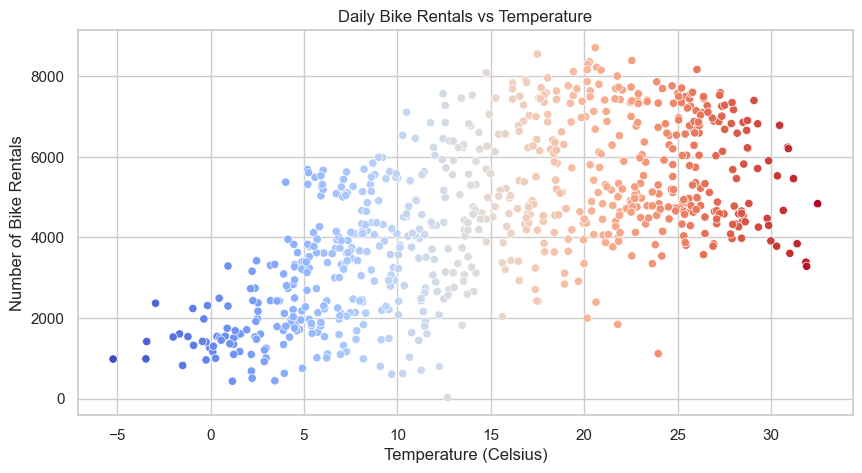

In [26]:
# viusalize data
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.scatterplot(x='temp_celsius', y='cnt', data=rental_daily_df, hue='temp_celsius', palette='coolwarm',legend=False)

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals vs Temperature')
plt.show()

> berdasarkan grafik scatter plot yang ditampilkan tampaknya ada korelasi positif yang kuat antara suhu dan jumlah peminjaman sepeda. Artinya, seiring dengan peningkatan suhu, jumlah peminjaman sepeda juga meningkat. Hubungan ini tampak kuat karena titik data cenderung berkumpul erat dalam pola linear. Jadi, dapat disimpulkan bahwa suhu mempengaruhi jumlah peminjaman sepeda.

### Pertanyaan 2: Apakah terdapat pola khusus dalam peminjaman sepeda selama hari kerja (working days) dibandingkan dengan akhir pekan (weekends)?

In [27]:
sum_rental_daily_df = rental_daily_df.groupby('workingday')['cnt'].sum().reset_index()

#rename workingday value from 0 and 1 to Non-Working Day and Working Day
sum_rental_daily_df['workingday'] = sum_rental_daily_df['workingday'].replace({0: 'Non-Working Day', 1: 'Working Day'})
sum_rental_daily_df.head()


,workingday,cnt
0,Non-Working Day,1000269
1,Working Day,2292410


C:\Users\Acer\AppData\Local\Temp\ipykernel_5912\2409115862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=sum_rental_daily_df, palette='muted')


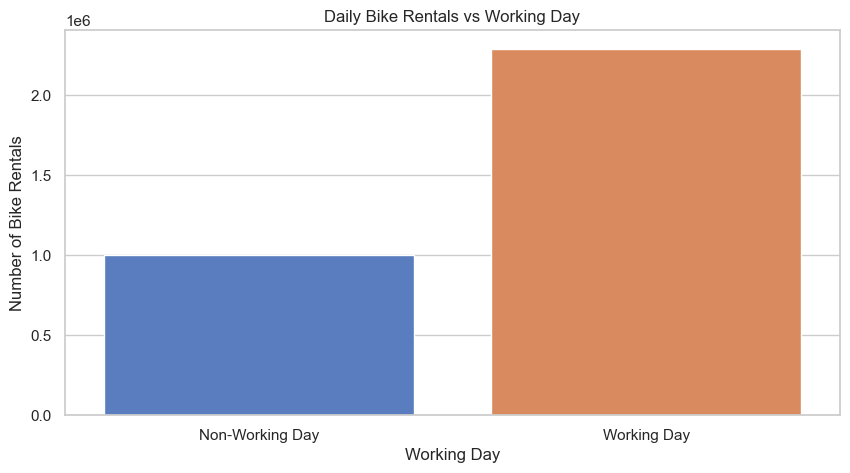

In [28]:

plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x='workingday', y='cnt', data=sum_rental_daily_df, palette='muted')

plt.xlabel('Working Day')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals vs Working Day')
plt.show()



> Berdasarkan bar plot diatas, terlihat jelas bahwa jumlah total peminjaman sepeda pada hari kerja dengan hari non-kerja dimana jumah peminjaman pada hari kerja 2 kali lipat lebih banyak dibandingkan hari non-kerja.

### Pertanyaan 3 : Bagaimana penggunaan sepeda berbeda antara tahun 2011 dan 2012? Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminjaman sepeda dari tahun ke tahun?

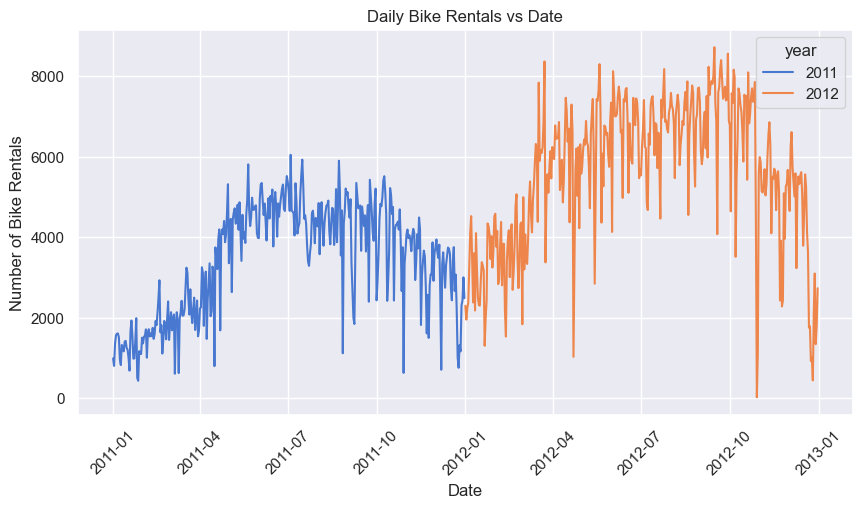

In [29]:
#rename column 'yr' to 'year'
rental_daily_df.rename(columns={'yr': 'year'}, inplace=True)

# mapping tahun
rental_daily_df['year'] = rental_daily_df['year'].replace({0: 2011, 1: 2012})

#change date format
rental_daily_df['dteday'] = pd.to_datetime(rental_daily_df['dteday'])
# visualisasi data
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
sns.lineplot(x='dteday', y='cnt', data=rental_daily_df, palette='muted', hue='year')

plt.xlabel('Date')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals vs Date')
plt.xticks(rotation=45)
plt.show()



>Grafik menunjukkan bahwa jumlah peminjaman sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011. 

### Pertanyaan 4 : Bagaimana penggunaan sepeda setiap musimnya? Apakah musim berpengaruh terhadap jumlah peminjaman sepeda yang dilakukan?

In [30]:
sum_season_rental_daily_df = rental_daily_df.groupby('season')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

highest_season = sum_season_rental_daily_df.iloc[0]['season']
sum_season_rental_daily_df.head()

,season,cnt
0,fall,1061129
2,summer,918589
3,winter,841613
1,spring,471348


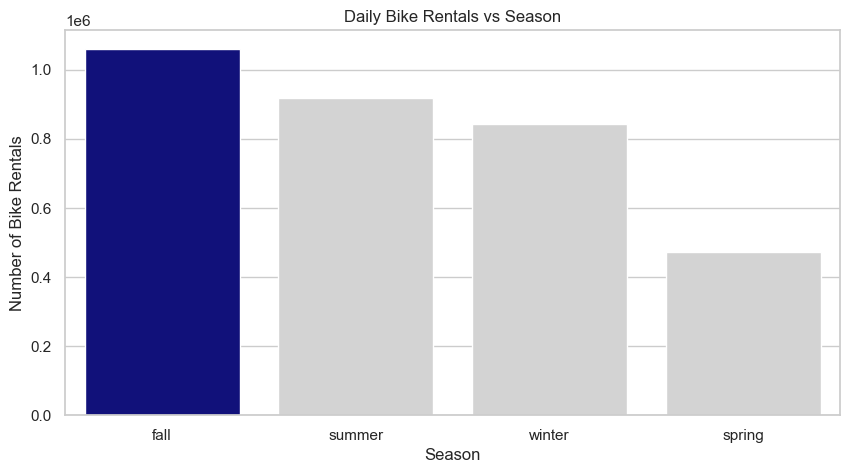

In [31]:
#visualisasi data
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x='season', y='cnt', data=sum_season_rental_daily_df,hue='season', palette=['DARKBLUE' if (x == highest_season) else '#D3D3D3' for x in sum_season_rental_daily_df['season']],order=sum_season_rental_daily_df['season'])

plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals vs Season')
plt.show()

> musim gugur menjadi musim tertinggi jumlah peminjaman sepeda

## Conclusion

>#### Bagaimana korelasi antara suhu dan jumlah peminjaman sepeda? Apakah terdapat hubungan yang kuat antara suhu dan peminjaman?
>>- berdasarkan visualisasi yang ditampilkan tampaknya ada korelasi positif yang kuat antara suhu dan jumlah peminjaman sepeda. Artinya, seiring dengan peningkatan suhu, jumlah peminjaman sepeda juga meningkat. Hubungan ini tampak kuat karena titik data cenderung berkumpul erat dalam pola linear. Jadi, dapat disimpulkan bahwa suhu mempengaruhi jumlah peminjaman sepeda.
>
>#### Apakah terdapat pola khusus dalam peminjaman sepeda selama hari kerja (working days) dibandingkan dengan bukan hari kerja (non-working days)?
>>- Berdasarkan visualisasi yang ditampilkan, terlihat jelas bahwa jumlah total peminjaman sepeda pada hari kerja dengan hari non-kerja dimana jumah peminjaman pada hari kerja 2 kali lipat lebih banyak dibandingkan hari non-kerja. Dapat disimpulkan bahwa orang-orang lebih membutuhkan sepeda untuk bekerja daripada untuk liburan.
>
>#### Bagaimana penggunaan sepeda berbeda antara tahun 2011 dan 2012? Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminjaman sepeda dari tahun ke tahun?
>>- Berdasarkan visualisasi yang ditampilkan, tahun 2012 terlihat ada peningkatan dari tahun 2011. Dapat disimpulkan dalam waktu 1 tahun orang-orang sudah lebih suka bersepeda dibanding tahun sebelumnya.
>
>#### Bagaimana penggunaan sepeda setiap musimnya? Apakah musim berpengaruh terhadap jumlah peminjaman sepeda yang dilakukan?
>>- Berdasarkan visualisasi yang ditampilkan, musim gugur menjadi musim tertinggi jumlah peminjaman sepeda karena saat musim gugur suhu tidak terlalu tinggi dan terlalu rendah sehingga sangat nyaman untuk bersepeda. sebaliknya, musim semi masih terlalu dingin sehingga tidak terlalu cocok untuk bersepeda. Dapat disimpulkan bahwa musim memengaruhi jumlah peminjaman sepeda
>
>> 
